# Solow model with endogenous Technological Progress

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 

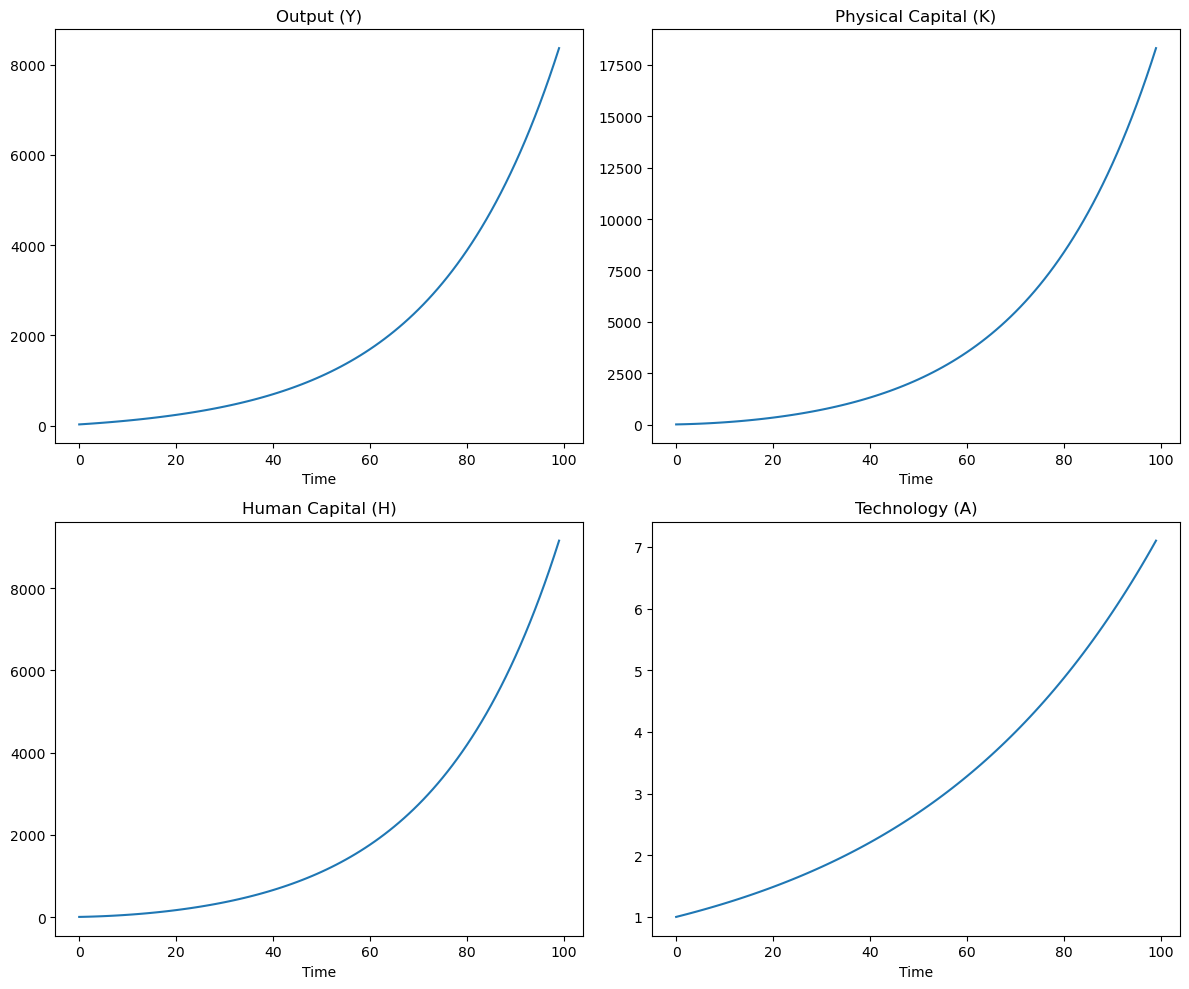

Steady State with (1+g)A_t: {'L_star': 710.2594233580734, 'H_star': 4.999926124225516, 'K_star': 9.999999999458291, 'A_star': 7.244646118252347, 'Y_star': 197.47394750635908}


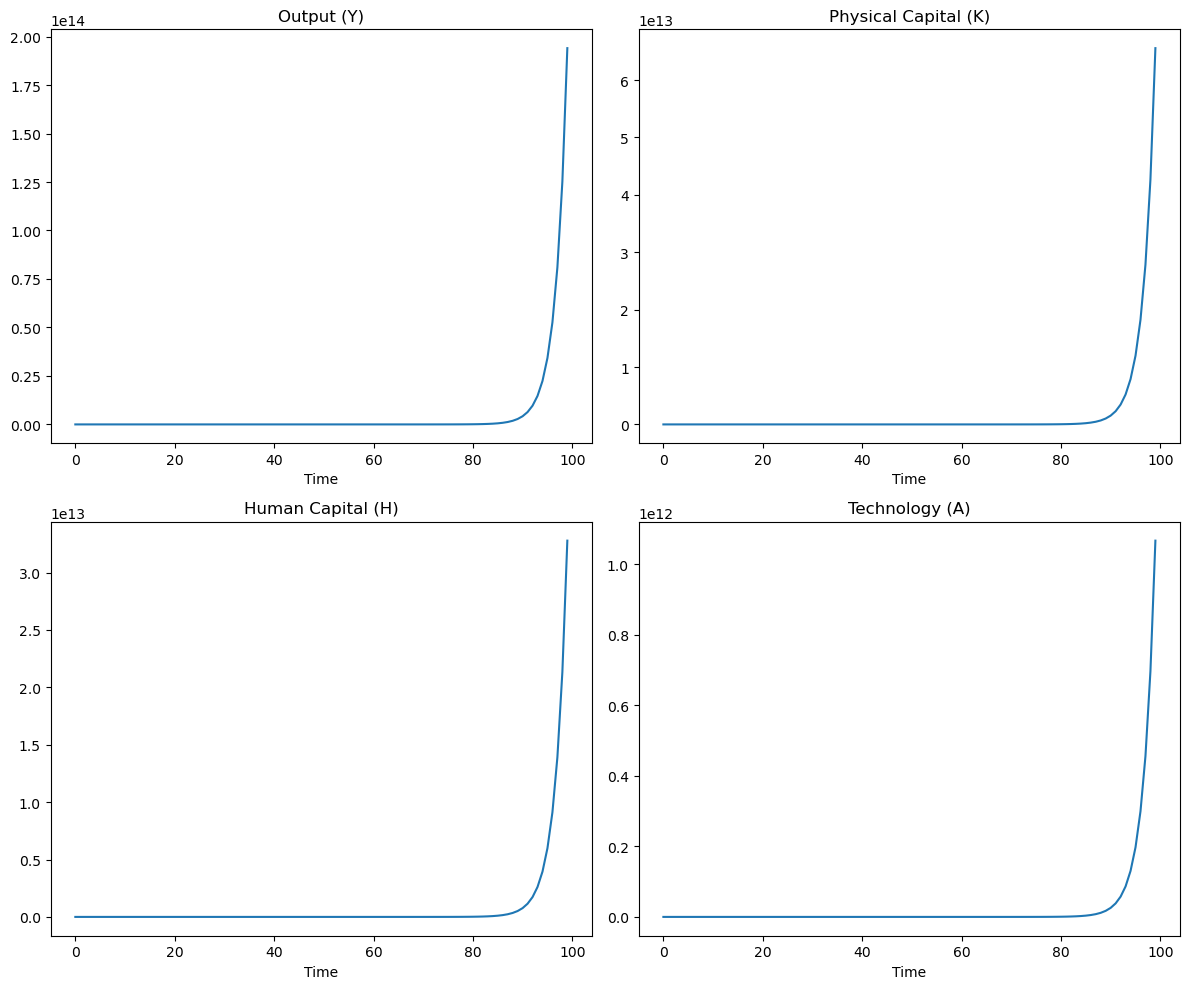

Steady State with endogenous A_t: {'L_star': 710.2594233580734, 'H_star': 4.999926124225516, 'K_star': 9.999999999458291, 'A_star': 0.24999630621127583, 'Y_star': 36.683267742659595}
Optimal alpha: 1.0, Optimal phi: 0.1459797993460159


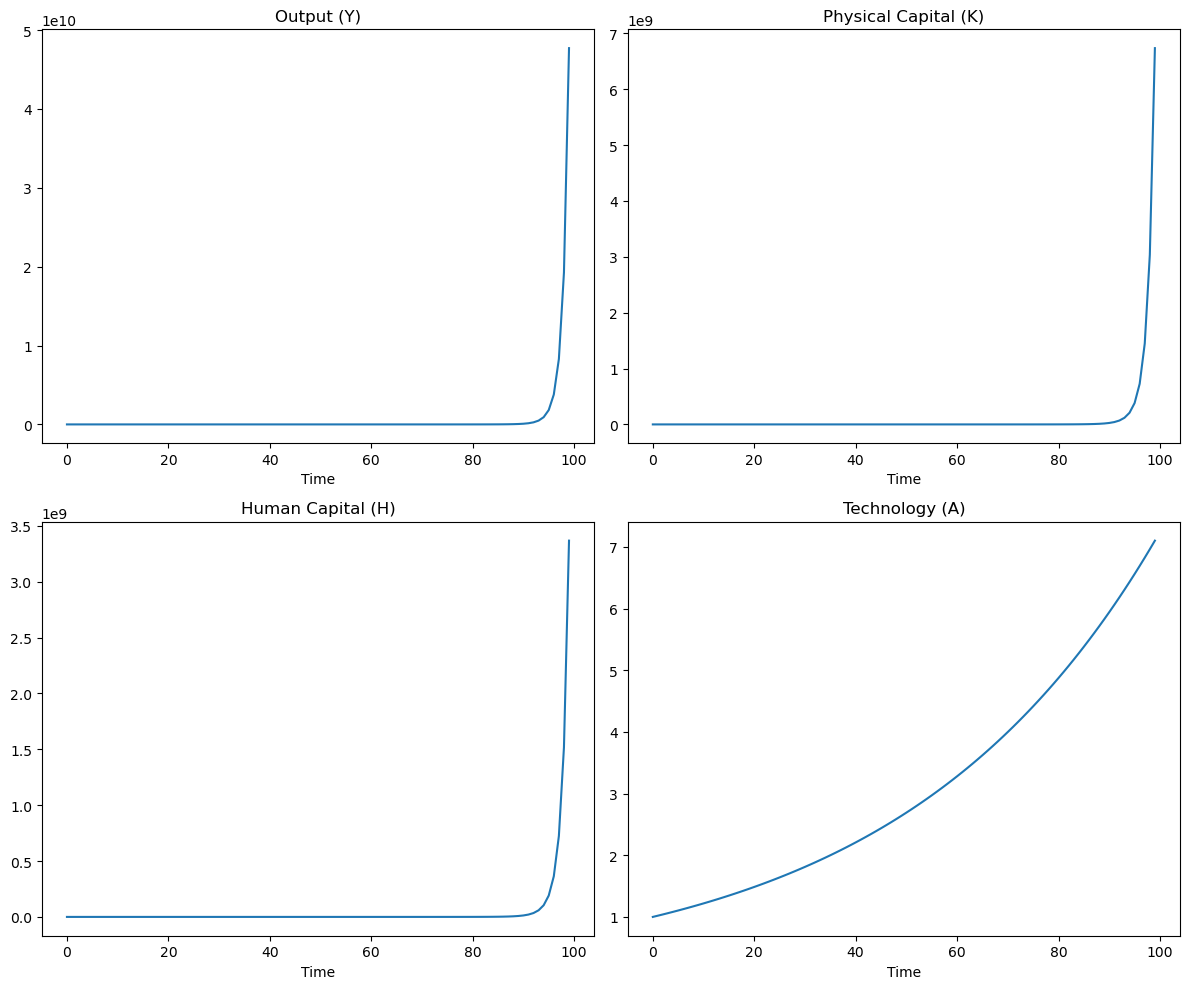

In [4]:
# Solow Model with Human Capital

#In this project, we analyze the Solow model with human capital and endogenous technological progress. 

from modelproject import SolowModelHumanCapital

# Initialize the model with original setup
model = SolowModelHumanCapital()
model.plot()

# Find the steady state for the original setup
steady_state = model.steady_state()
print(f"Steady State with (1+g)A_t: {steady_state}")

# Initialize the model with endogenous technology setup
model_endogenous = SolowModelHumanCapital(endogenous=True)
model_endogenous.plot()

# Find the steady state for the endogenous setup
steady_state_endogenous = model_endogenous.steady_state()
print(f"Steady State with endogenous A_t: {steady_state_endogenous}")

# Optimize the model
opt_result = model.optimize()
print(f"Optimal alpha: {opt_result.x[0]}, Optimal phi: {opt_result.x[1]}")
model.plot()
